# Split mouse neural crest data into different scale

## Library imports

In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import anndata as ad

import pandas as pd
import matplotlib.pyplot as plt
import mplscience

from collections import Counter
import pandas as pd

from rgv_tools import DATA_DIR, FIG_DIR

/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_t

## General settings

In [2]:
sc.settings.verbosity = 2
scv.settings.verbosity = 3

In [3]:
plt.rcParams["svg.fonttype"] = "none"
scv.settings.set_figure_params("scvelo", dpi=100, transparent=True, fontsize=14, color_map="viridis")

## Constants

In [4]:
DATASET = "mouse_neural_crest"

In [5]:
SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / "processed").mkdir(parents=True, exist_ok=True)

SAVE_FIGURES = True
if SAVE_FIGURES:
    (FIG_DIR / DATASET).mkdir(parents=True, exist_ok=True)
FIGURE_FORMAT = "svg"

In [6]:
TERMINAL_STATE = [
    "Melanocytes",
    "enFib",
    "SC",
    "Mesenchyme",
    "Sensory",
    "ChC",
    "SatGlia",
    "Gut_glia",
    "Gut_neuron",
    "Symp",
    "BCC",
]
Location = ["Cranial", "Trunk", "DRG", "Limb", "Enteric", "Sympathoadrenal system", "Incisor"]

## Functions definations

In [7]:
def count_cell_types(cell_type_list, class_list):
    counter = Counter(cell_type_list)

    result = {cls: counter.get(cls, 0) for cls in class_list}

    df = pd.DataFrame({"Cell Type": list(result.keys()), "Count": list(result.values())})

    return df

## Data loading

In [8]:
ldata = ad.io.read_h5ad(DATA_DIR / DATASET / "raw" / "GSE201257_adata_velo_raw.h5ad")
adata = ad.io.read_h5ad(DATA_DIR / DATASET / "raw" / "GSE201257_adata_processed.h5ad")

## Annotate all datasets

We followed the annotation procedure provided by original authors, please check https://github.com/LouisFaure/glialfates_paper

In [9]:
adata.layers["GEX"] = adata.X.copy()

In [10]:
adata.X = sc.pp.scale(adata.layers["palantir_imp"], max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [11]:
sc.tl.score_genes(
    adata,
    ["Ret", "Phox2a", "Chrna3", "Sox11"],
    score_name="Gut_neuron",
)
adata.obs.Gut_neuron = adata.obs.Gut_neuron > 1.5
sc.tl.score_genes(adata, ["Prdm12", "Isl2", "Pou4f1", "Six1"], score_name="Sensory")
adata.obs.Sensory = adata.obs.Sensory > 1
sc.tl.score_genes(adata, ["Cartpt", "Prph", "Mapt", "Maoa"], score_name="Symp")
adata.obs.Symp = adata.obs.Symp > 1.5
sc.tl.score_genes(adata, ["Lum", "Dcn", "Fbn1"], score_name="enFib")
adata.obs.enFib = adata.obs.enFib > 2.5
sc.tl.score_genes(adata, ["Th", "Dbh", "Chga", "Chgb", "Slc18a1", "Slc18a2"], score_name="ChC")
adata.obs.ChC = adata.obs.ChC > 2
sc.tl.score_genes(adata, ["Phox2b", "Ctgf", "Nfia", "Tgfb2", "S100b"], score_name="Gut_glia")
adata.obs.Gut_glia = adata.obs.Gut_glia > 2.5
sc.tl.score_genes(adata, ["Sox9", "Wnt1", "Ets1", "Crabp2"], score_name="NCC")
adata.obs.NCC = adata.obs.NCC > 0.6
sc.tl.score_genes(adata, ["Prrx1", "Prrx2", "Pdgfra"], score_name="Mesenchyme")
adata.obs.Mesenchyme = adata.obs.Mesenchyme > 0.4
sc.tl.score_genes(adata, ["Dct", "Mitf", "Pmel", "Tyr"], score_name="Melanocytes")
adata.obs.Melanocytes = adata.obs.Melanocytes > 1
sc.tl.score_genes(adata, ["Fabp7", "Ptn", "Rgcc"], score_name="SatGlia")
adata.obs.SatGlia = adata.obs.SatGlia > 2.6

computing score 'Gut_neuron'
    finished (0:00:01)
computing score 'Sensory'
    finished (0:00:00)
computing score 'Symp'
    finished (0:00:00)
computing score 'enFib'
    finished (0:00:00)
computing score 'ChC'
    finished (0:00:00)
computing score 'Gut_glia'
    finished (0:00:00)
computing score 'NCC'
    finished (0:00:01)
computing score 'Mesenchyme'
    finished (0:00:00)
computing score 'Melanocytes'
    finished (0:00:00)
computing score 'SatGlia'
    finished (0:00:00)


In [12]:
sc.tl.score_genes(adata, ["Mpz", "Plp1", "Fbxo7", "Gjc3", "Pmp22", "Dhh", "Mal"], score_name="SC")
adata.obs.SC = adata.obs.SC > 1.35

computing score 'SC'
    finished (0:00:00)


In [13]:
sc.tl.score_genes(adata, ["Prss56", "Egr2", "Wif1", "Hey2"], score_name="BCC")
adata.obs.BCC = adata.obs.BCC > 6

computing score 'BCC'
    finished (0:00:00)


In [14]:
celltypes = [
    "NCC",
    "Symp",
    "ChC",
    "Sensory",
    "Gut_glia",
    "Gut_neuron",
    "Melanocytes",
    "SC",
    "enFib",
    "Mesenchyme",
    "SatGlia",
    "BCC",
]
adata.obs["conflict"] = adata.obs[celltypes].sum(axis=1) > 1

adata.obs.loc[adata.obs[celltypes].sum(axis=1) > 1, celltypes] = False

adata.obs.loc[adata.obs[celltypes].sum(axis=1) == 2, celltypes] = False

annot = adata.obs.loc[:, celltypes].apply(lambda x: np.argwhere(x.values), axis=1)
annot = annot[annot.apply(len) == 1]
annot = annot.apply(lambda x: np.array(celltypes)[x][0][0])

adata.obs["assignments"] = "none"
adata.obs.loc[annot.index, "assignments"] = annot.values
adata.obs["assignments"] = adata.obs["assignments"].astype("category")

In [15]:
adata.obs.assignments.cat.categories

Index(['BCC', 'ChC', 'Gut_glia', 'Gut_neuron', 'Melanocytes', 'Mesenchyme',
       'NCC', 'SC', 'SatGlia', 'Sensory', 'Symp', 'enFib', 'none'],
      dtype='object')

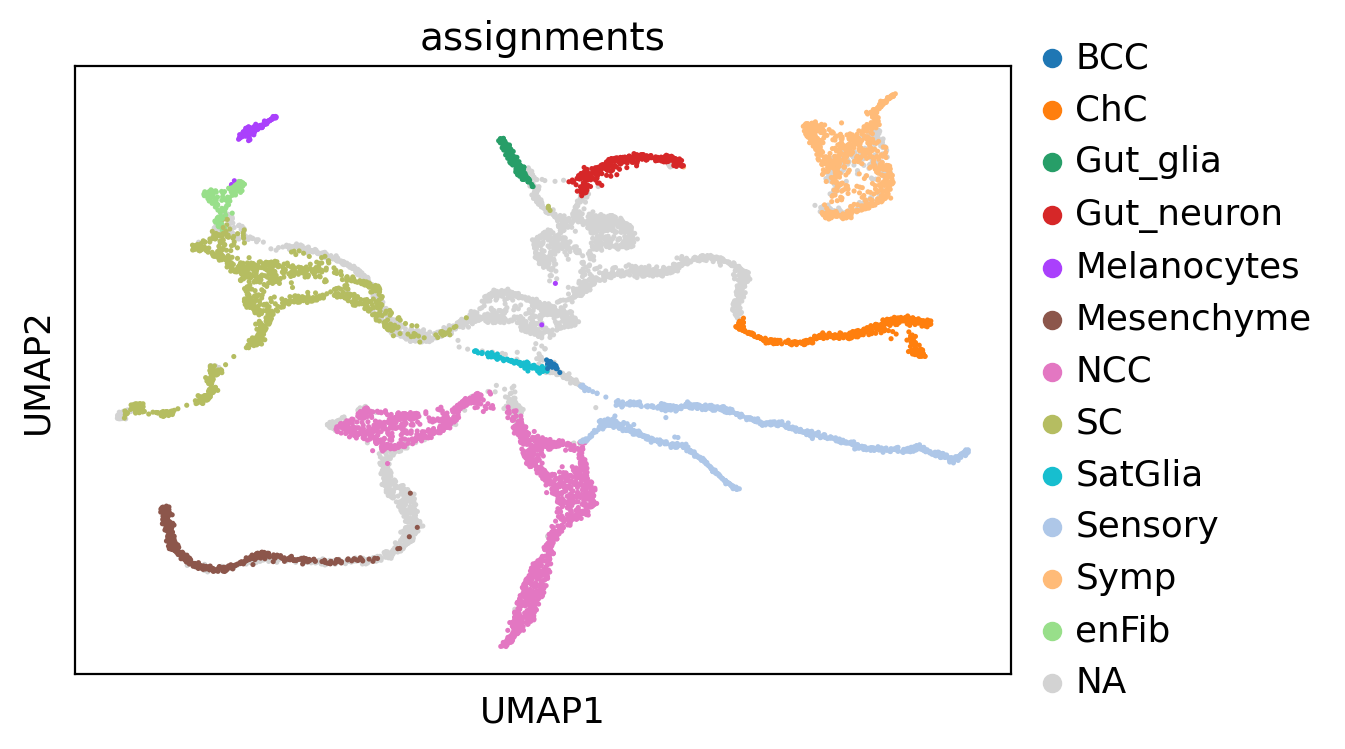

In [16]:
sc.pl.umap(adata, color="assignments", groups=celltypes)

In [17]:
set(TERMINAL_STATE).intersection(np.unique(adata.obs["assignments"]))

{'BCC',
 'ChC',
 'Gut_glia',
 'Gut_neuron',
 'Melanocytes',
 'Mesenchyme',
 'SC',
 'SatGlia',
 'Sensory',
 'Symp',
 'enFib'}

In [18]:
adata.obs["all_states"] = adata.obs["assignments"].astype("str")
adata.obs["all_states"][adata.obs["all_states"] == "none"] = np.nan

In [19]:
adata.obs["all_states"] = adata.obs["all_states"].astype("category")
state_names = adata.obs["all_states"].cat.categories.tolist()

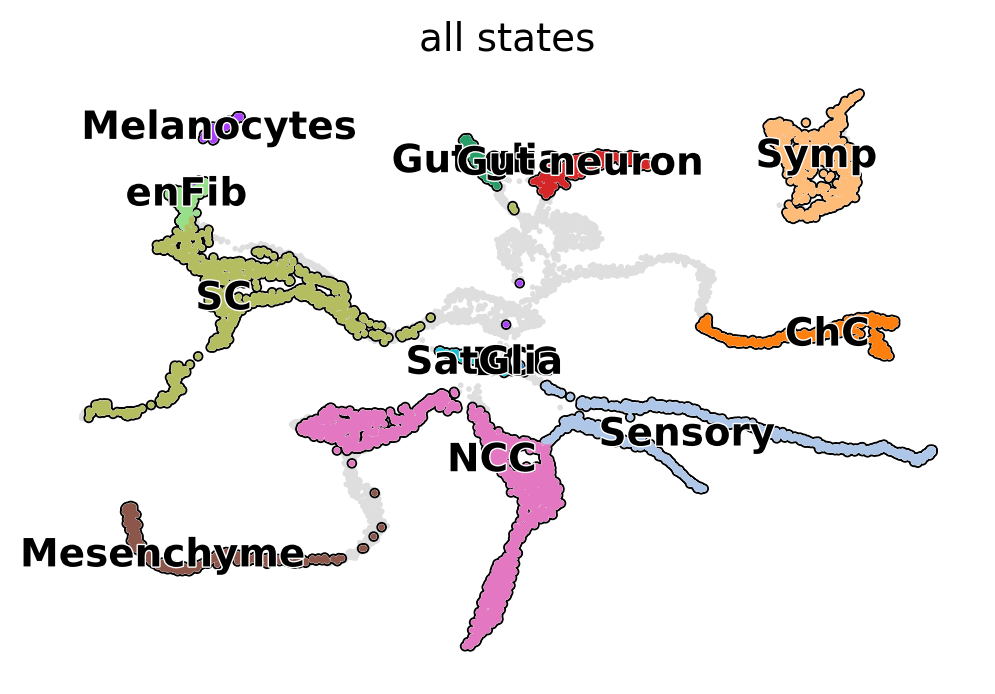

In [20]:
adata.obs["all_states"] = (
    adata.obs["all_states"].astype(str).astype("category").cat.reorder_categories(["nan"] + state_names)
)
adata.uns["all_states_colors"] = ["#dedede"] + adata.uns["assignments_colors"][:12]

scv.pl.scatter(
    adata,
    basis="X_umap",
    c="all_states",
    add_outline=state_names,
)

## Merge spliced/unspliced readout

In [21]:
# adata=scv.utils.merge(adata,ldata)
# adata.obsp=None
del adata.uns["neighbors"]

In [22]:
adata

AnnData object with n_obs × n_vars = 8842 × 21676
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'all_states'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'paga', 'umap', 'assignments_colors', 'all_states_colors'
    obsm: 'X_diff', 'X_pca', 'X_umap'
    layers: 'palantir_imp', 'scaled', 'GEX'
    obsp: 'connectivities', 'distances'

## Split into different scale level

In [23]:
Location

['Cranial',
 'Trunk',
 'DRG',
 'Limb',
 'Enteric',
 'Sympathoadrenal system',
 'Incisor']

In [24]:
adatas = []
for i in range(2, 7):
    adatas.append(adata[[c in Location[: (i + 1)] for c in adata.obs["location"]]].copy())
del adatas[3]  # Merge last two stage

In [25]:
adatas

[AnnData object with n_obs × n_vars = 4012 × 21676
     obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'all_states'
     var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
     uns: 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'paga', 'umap', 'assignments_colors', 'all_states_colors'
     obsm: 'X_diff', 'X_pca', 'X_umap'
     layers: 'palantir_imp', 'scaled', 'GEX'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 5198 × 21676
     obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'dou

## For each scale we independently build UMAP

Following preprocessing procedure in glia fate data preprocessing code

In [26]:
adatas_p = []
for ad_idx in range(len(adatas)):
    ad = adatas[ad_idx]

    st = count_cell_types(ad.obs["assignments"], TERMINAL_STATE)
    ad = ad[[i not in st["Cell Type"][st["Count"] < 30].tolist() for i in ad.obs["assignments"]]].copy()

    ## UMAP embedding
    sc.pp.neighbors(ad, n_neighbors=80, use_rep="X_diff")

    adatas_p.append(ad)

computing neighbors


2025-08-19 14:39:44.772428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755607185.730112 2476790 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755607186.191275 2476790 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


    finished (0:01:08)
computing neighbors
    finished (0:00:00)
computing neighbors
    finished (0:00:00)
computing neighbors
    finished (0:00:18)


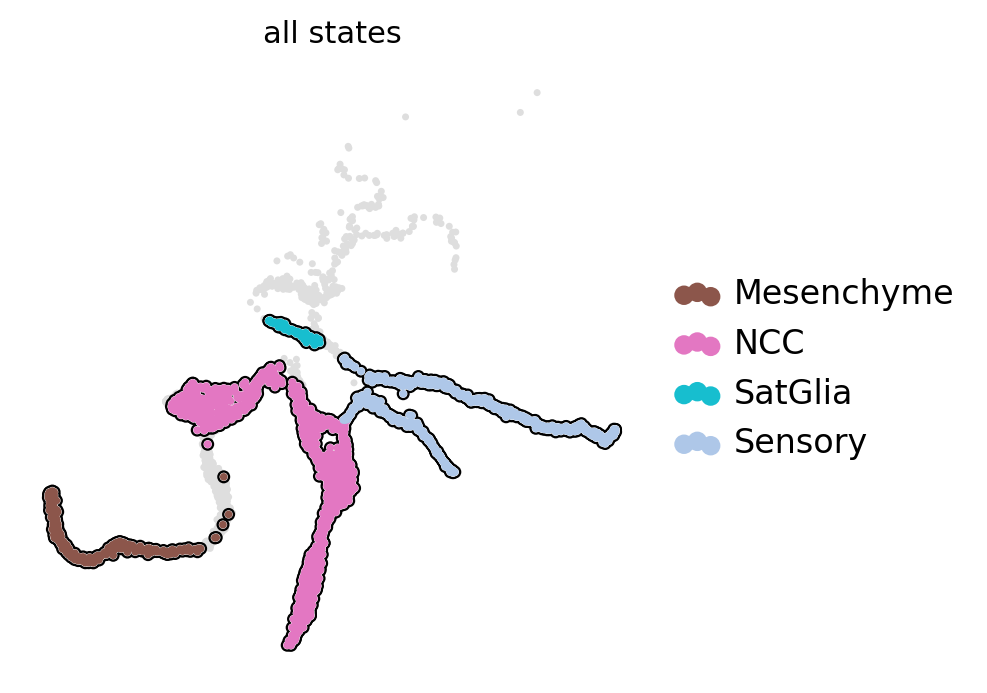

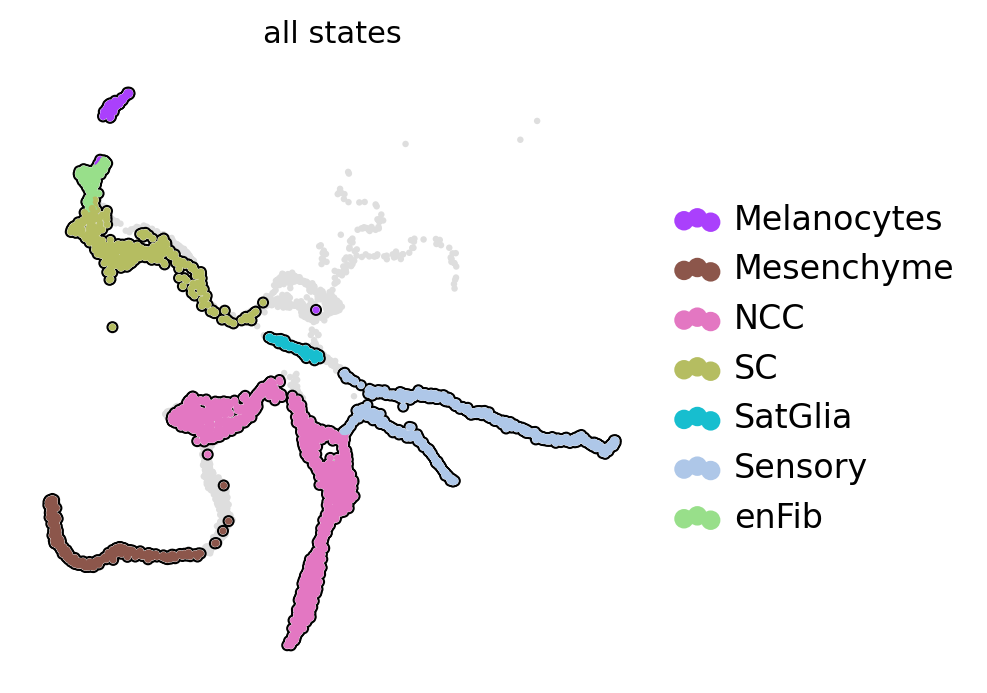

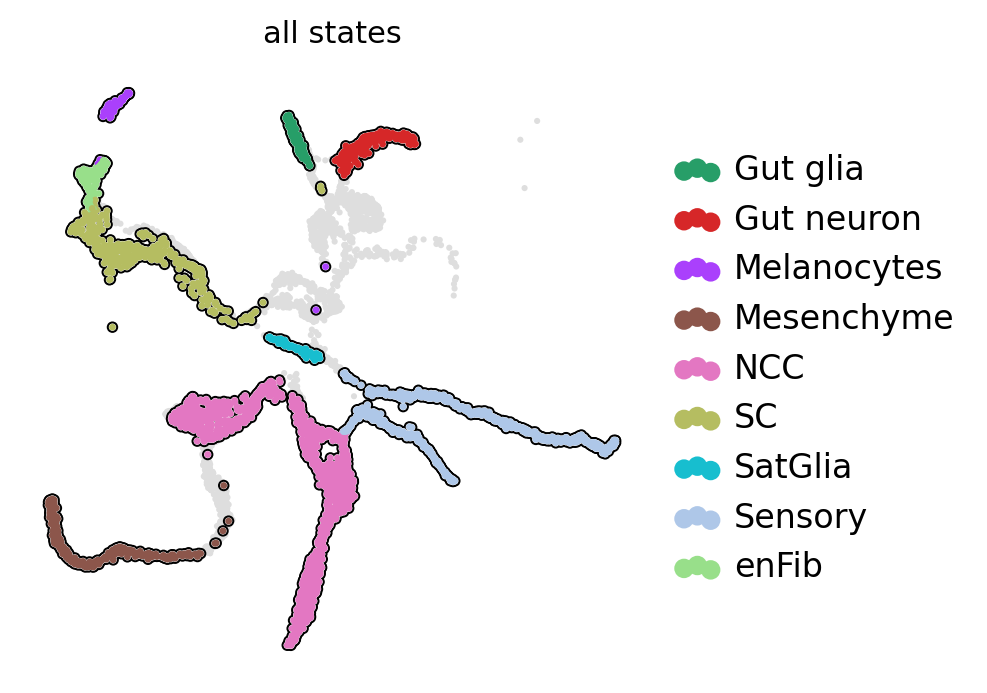

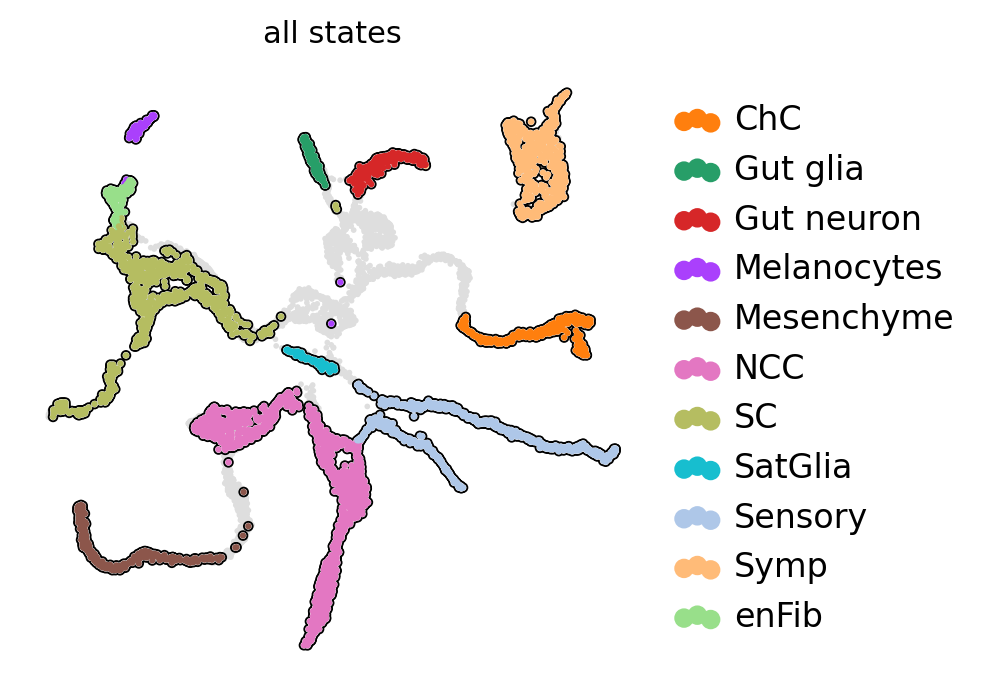

In [27]:
for idx in range(4):
    ad = adatas_p[idx].copy()
    ad.X = ad.layers["GEX"].copy()

    with mplscience.style_context():
        fig, ax = plt.subplots(figsize=(4, 4))
        # scv.pl.scatter(adata[cells,:], c="assignments", ax=ax,frameon = False,add_outline = set(celltypes).intersection(np.unique(adata.obs["assignments"])),legend_loc = "right")
        scv.pl.scatter(ad, basis="X_umap", c="all_states", add_outline=state_names, legend_loc="right", ax=ax)

        if SAVE_FIGURES:
            fig.savefig(
                FIG_DIR / DATASET / f"scale_{idx+1}_umap.svg",
                format=FIGURE_FORMAT,
                transparent=True,
                bbox_inches="tight",
            )

    if SAVE_DATA:
        ad.write_h5ad(DATA_DIR / DATASET / "processed" / f"adata_stage{idx+1}_processed.h5ad")